# Car Detiction model

### We aim to train a model that can detect whether a car is present in a given picture. To achieve this, we found two datasets on Kaggle: one containing random images and another with car images. These datasets will be used to train the model for car detection

# **Data Collection** 
### the first data we used contains **CAR** images split into train and test files
> the training file contains 8144 images and the test file aontains 8041 images in total the dataset contains 16185 images
### the second data we used contains **RANDOM** images split into train and test files
> the training file contains 6469 images and the test file aontains 3489 images in total the dataset contains 9958 images
### we will use the ranodm images with car images to train the model on car detection

# step 1: import libraries and read files
### first we import the libraries we need

In [203]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import layers, models,regularizers
from tensorflow.keras.callbacks import EarlyStopping

### second we save the files path in a variable

In [204]:
car_images_Train_path = 'cars_train'
car_images_Test_path = 'cars_test'

random_Train_path = 'Random/train'
random_Test_path = 'Random/test'

# **PREPROCESSING**

# step 2: image resizing and Display
### the images in the datasets have different sizes and that difference can afect the model accuracy 
### we made the call to resize all the images to be 64 * 64
### the next cell shows a function for loading and resizing images 

In [205]:
 # Fixed scale size 
fixed_size = (64, 64)

# Function to load and resize images from a directory
def load_and_resize_images(folder_path, size):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, size)  # Resize image to fixed size
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            images.append(img)
    return images

### the next cells calls the function and resizes each image on all the files

In [206]:
# Load and resize car images
car_images_train = load_and_resize_images(car_images_Train_path, fixed_size)
print(f"Loaded and resized {len(car_images_train)} car images to {fixed_size}.")

Loaded and resized 8144 car images to (64, 64).


In [207]:
# Load and resize random images
car_images_test = load_and_resize_images(car_images_Test_path, fixed_size)
print(f"Loaded and resized {len(car_images_test)} random images to {fixed_size}.")

Loaded and resized 8041 random images to (64, 64).


In [208]:
# Load and resize car images
random_images_train = load_and_resize_images(random_Train_path, fixed_size)
print(f"Loaded and resized {len(random_images_train)} car images to {fixed_size}.")

Loaded and resized 6469 car images to (64, 64).


In [209]:
# Load and resize random images
random_images_test = load_and_resize_images(random_Test_path, fixed_size)
print(f"Loaded and resized {len(random_images_test)} random images to {fixed_size}.")

Loaded and resized 3489 random images to (64, 64).


### the next cell show a function to display the first 5 images after resizing to make sure it worked

In [210]:
# Display resized images using Matplotlib
def display_images(images, num_to_display=5):
    plt.figure(figsize=(15, 10))
    for i in range(min(num_to_display, len(images))):
        plt.subplot(1, num_to_display, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

### the next cells shwes the first 5 oictures of each file after resize

Displaying resized car images train...


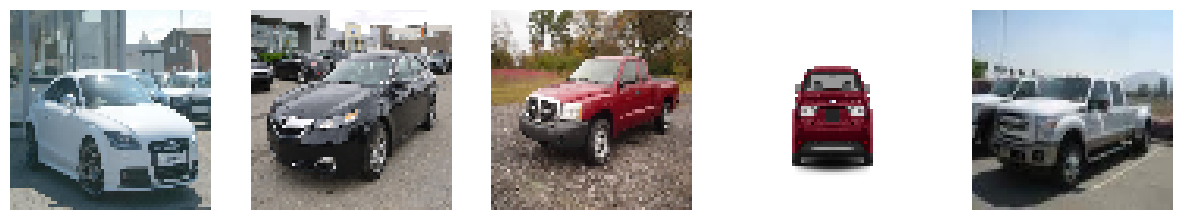

In [211]:
# Display resized car images
print("Displaying resized car images train...")
display_images(car_images_train)

Displaying resized car images test...


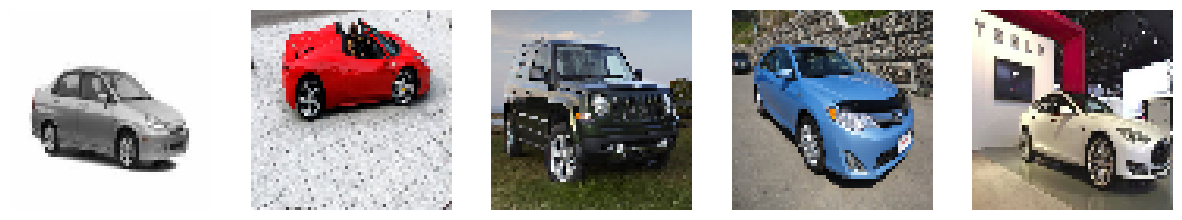

In [212]:
# Display resized car images
print("Displaying resized car images test...")
display_images(car_images_test)

Displaying resized random train...


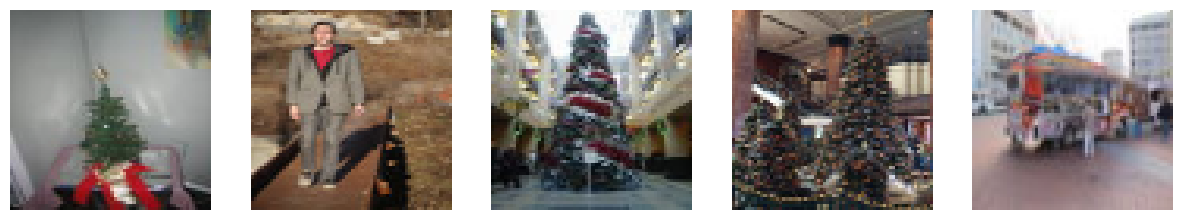

In [213]:
# Display resized random images
print("Displaying resized random train...")
display_images(random_images_train)

Displaying resized random test...


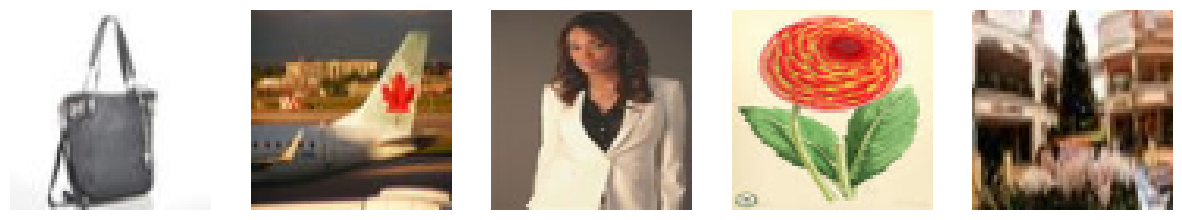

In [214]:
# Display resized random images
print("Displaying resized random test...")
display_images(random_images_test)

### in the next cell we created new labels for cars and non cars to train the model on it

In [215]:
# Label the images: 1 for cars, 0 for random
car_labels_train = [1] * len(car_images_train)
car_labels_test = [1] * len(car_images_test)
random_labels_train = [0] * len(random_images_train)
random_labels_test = [0] * len(random_images_test)

### this cell shows how we combined the **car** and **random** datasets 

In [216]:
# Combine the images and labels
X_train = np.array(car_images_train + random_images_train)
y_train = np.array(car_labels_train + random_labels_train)

In [217]:
X_test = np.array(car_images_test + random_images_test)
y_test = np.array(car_labels_test + random_labels_test)

### here we normalize the datafarme to be in range 0 to 1

In [218]:
# Normalize the images (scaling pixel values to range [0, 1])
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# **MODEL SELECTION AND IMPLEMENTATION**

## we decided to use **Conventual Nural Networks** model because it's useful for computer vision tasks such as image recognition and classification

### the next cell shows our model and the layers whithin the model we used **two** cnn layers and used **batch normlaization** and **Dropout** to prevent **Overfiting**

In [219]:


model = models.Sequential([

    # Convolutional Layer and pooling
    layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer = regularizers.l2(0.01),padding='same', input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer = regularizers.l2(0.01), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer = regularizers.l2(0.01), padding='same'),
    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(0.01), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(0.01), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(0.01), padding='same'),
    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),


    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

### complie the model we used the adam optimizer and binary_crossentropy becouse its ether a car or not

In [220]:
# Use binary_crossentropy for binary classification
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### this shows model layers

In [221]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,649,729 (17.74 MB)

 Trainable params: 4,648,577 (17.73 MB)

 Non-trainable params: 1,152 (4.50 KB)

### this shows model architecture

In [222]:
# !pip uninstall pydot graphviz
# !pip install pydot graphviz

In [223]:
# # Display the model's architecture
# keras.utils.plot_model(model, "CNN.png", show_shapes=True)

# **MODEL TRAINING AND EVALUATION**

### here we trained our model with batch size of 32 and validation split of 0.2
### we used callbacks to find the best weights and restore them

In [224]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 165s 441ms/step - accuracy: 0.9167 - loss: 4.3384 - val_accuracy: 1.0000 - val_loss: 1.1004
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 163s 445ms/step - accuracy: 0.9764 - loss: 0.9098 - val_accuracy: 0.9945 - val_loss: 0.4637
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 167s 456ms/step - accuracy: 0.9845 - loss: 0.3961 - val_accuracy: 1.0000 - val_loss: 0.1916
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 177s 482ms/step - accuracy: 0.9842 - loss: 0.2624 - val_accuracy: 0.9993 - val_loss: 0.1125
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 175s 479ms/step - accuracy: 0.9878 - loss: 0.1484 - val_accuracy: 0.9976 - val_loss: 0.1169


### this cell shows model accuracy and loss

In [225]:
# Evaluate the model
model.evaluate(X_test, y_test)

361/361 ━━━━━━━━━━━━━━━━━━━━ 30s 82ms/step - accuracy: 0.8688 - loss: 0.4137


[0.3371553122997284, 0.9013009667396545]

### in the next cell we wanted to check for ourselves if the model detction was correct or not

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


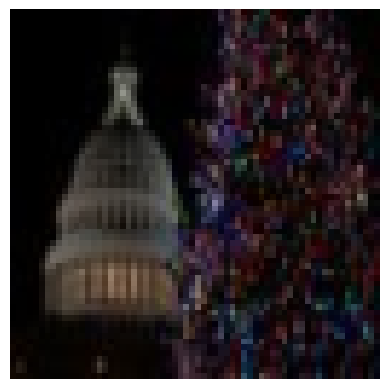

Prediction: Not a Car (Class: 0.0019681481644511223)
True Label: Not a Car
0
[[0.00196815]]


In [226]:
#Choose a random image from the test set
random_index = np.random.randint(0, len(X_test))
test_image = X_test[random_index]
true_label = y_test[random_index]

#Reshape the image to match the model's input shape
test_image = np.expand_dims(test_image, axis=0)

#Make a prediction
prediction = model.predict(test_image)

#Display the image and the prediction
plt.imshow(test_image[0])
plt.axis('off')
plt.show()

predicted_class = "Car" if prediction > 0.5 else "Not a Car"
print(f"Prediction: {predicted_class} (Class: {prediction[0][0]})")
print(f"True Label: {'Car' if true_label == 1 else 'Not a Car'}")
print(true_label) 
print(prediction)


### here we show the model training and validation plot

In [227]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 175s 477ms/step - accuracy: 0.9705 - loss: 0.4287 - val_accuracy: 1.0000 - val_loss: 0.2421
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 176s 481ms/step - accuracy: 0.9822 - loss: 0.2514 - val_accuracy: 1.0000 - val_loss: 0.1088
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 174s 475ms/step - accuracy: 0.9903 - loss: 0.1406 - val_accuracy: 1.0000 - val_loss: 0.0664
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 178s 486ms/step - accuracy: 0.9866 - loss: 0.1614 - val_accuracy: 1.0000 - val_loss: 0.1557
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 178s 488ms/step - accuracy: 0.9848 - loss: 0.2065 - val_accuracy: 0.9997 - val_loss: 0.2237
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 175s 478ms/step - accuracy: 0.9829 - loss: 0.2188 - val_accuracy: 1.0000 - val_loss: 0.0840
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 180s 492ms/step - accuracy: 0.9879 - loss: 0.1250 - val_accuracy: 1.0000 - val_loss: 0.1155
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 181s 495ms/step - accuracy: 0.9869 -

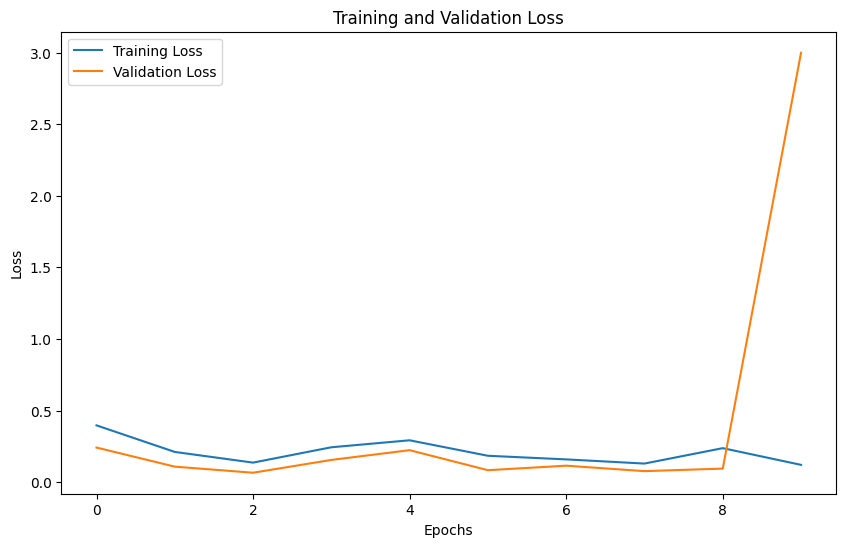

In [228]:
import matplotlib.pyplot as plt

# Plotting the training loss vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **THANK YOU :)**